In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data to check
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


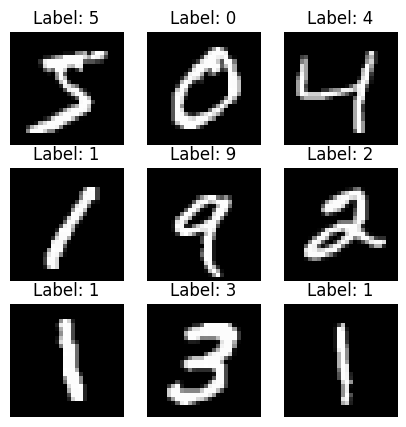

In [4]:
import matplotlib.pyplot as plt

# Display first 9 images from the training set
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [5]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add channel (grayscale image)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    # First Convolution layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    # Second Convolution layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten the 2D images into 1D
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),

    # Output layer (10 classes for digits 0-9)
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Check the summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9092 - loss: 0.2910 - val_accuracy: 0.9854 - val_loss: 0.0455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9845 - loss: 0.0449 - val_accuracy: 0.9871 - val_loss: 0.0409
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9890 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9884 - val_loss: 0.0392


In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9856 - loss: 0.0499
Test Accuracy: 98.84%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


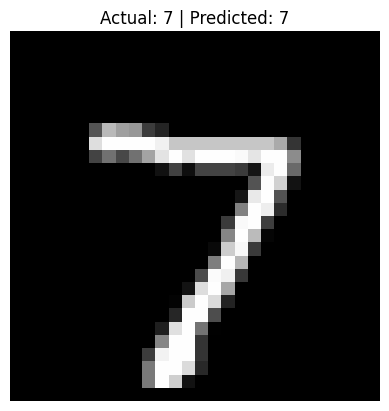

In [11]:
# Make prediction on the first image in test data
import numpy as np
import matplotlib.pyplot as plt

# Predict
predictions = model.predict(x_test)

# Get the prediction for the first image
predicted_label = np.argmax(predictions[0])
actual_label = y_test[0]

# Display the image
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()


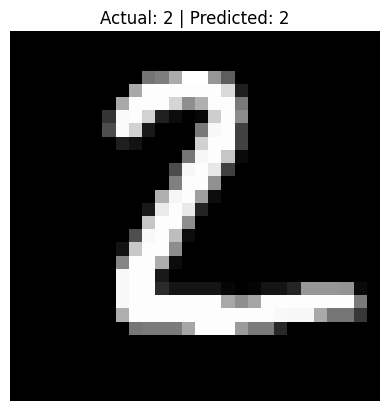

In [24]:
i = 2  # Change this number to test other images

predicted_label = np.argmax(predictions[i])
actual_label = y_test[i]

plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [27]:
# Save in new Keras format
model.save('handwritten_digit_model.keras')

